In [6]:
# import matplotlib as mpl
# mpl.font_manager.FontManager().ttflist

Text(0.5, 1.0, '可视化图鉴')

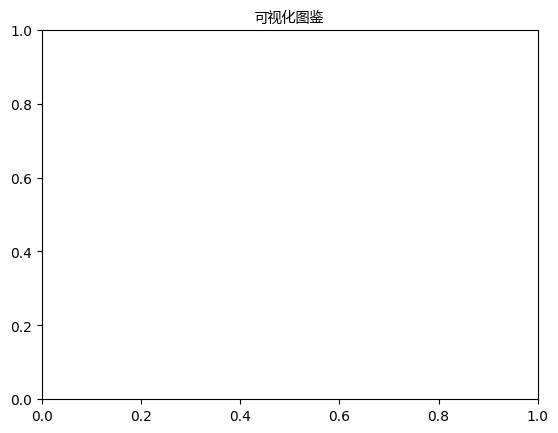

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.font_manager
# fontproperties = WRYH
WRYH = mpl.font_manager.FontProperties(fname = './figures/yahei.ttf') #微软雅黑字体
plt.title('可视化图鉴',fontproperties = WRYH)

# <div align='center'>第1章 数据描述性分析</div>
### 内容
 <div align='left'>                  
     <font color='steelblue' size=4>
       1.1 描述统计量<br>
       1.2 数据的分布<br>
       1.3 概率分布函数的图形<br>
       1.4 直方图、经验分布与QQ图<br>
       1.5 多元数据的数据特征与相关性分析<br>
       1.6 多元数据的基本图形表示<br>
         </font>
       </div>

数据的统计分析分为**统计描述**和统计推断两部分。

前者通过绘制统计图、编制统计表、计算统计量等方法表述数据的分布特征，是数据分析的基本步骤，也是统计推断的基础。其优点在于方便、直观，利于对数据特征的理解。

In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 1.1  描述统计量
数据是信息的载体，从数据到信息，需要先分析数据的主要特征，这些特征包括数据的位置度量、分散程度度量、关系度量以及分布形状的度量
## 1.1.1 位置与分散程度的度量

In [3]:
'''
示例：某学校15个学生体重（单位：公斤）抽样调查数据.
通过 np.array 进行数据量的创建
'''
weights =np.array([75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7, 
                    63.5,66.6, 64.0, 57.0, 69.0, 56.9, 50.0, 72.])

weights

array([75. , 64. , 47.4, 66.9, 62.2, 62.2, 58.7, 63.5, 66.6, 64. , 57. ,
       69. , 56.9, 50. , 72. ])

In [4]:
# 均值 mean
w_mean = np.mean(weights)
w_mean1 = weights.mean()
print('学生体重的均值的两种求解方式：',w_mean,w_mean1,"\n")

# 限定范围内的数据求均值 truncated mean or trimmed mean
# 通过元组(60,70)对于数据进行截断，可以用于对于离群值的筛选
limitedMean = st.tmean(weights,(60,70))
print('学生体重限定(60,70)范围内的数据求均值：',limitedMean,"\n")

# sorted函数默认reverse等于false,代表升序
# 所以reverse等于true应该是降序
# 不管是R的sort()还是python的sorted(),默认升序
sorted_weig = sorted(weights,reverse=True)#reverse的缺省值为False
print("sorted函数倒序：",sorted_weig)

学生体重的均值的两种求解方式： 62.36 62.36 

学生体重限定(60,70)范围内的数据求均值： 64.8 

sorted函数倒序： [75.0, 72.0, 69.0, 66.9, 66.6, 64.0, 64.0, 63.5, 62.2, 62.2, 58.7, 57.0, 56.9, 50.0, 47.4]


In [5]:
# 中位数 median
median_weig = np.median(weights)
print('学生体重的中位数：',median_weig)

# 分位数 quantile
quantiles = np.quantile(weights,[0.1,0.2,0.4,0.6,0.8,1])
print('学生体重的[10%,20%,40%,60%,80%,100%]分位数：',quantiles)

学生体重的中位数： 63.5
学生体重的[10%,20%,40%,60%,80%,100%]分位数： [52.76 56.98 62.2  64.   67.32 75.  ]


In [7]:
'''
方差、标准差、极差与标准误

极差就是样本的最大值减去最小值
'''
# 注意方差与方差的无偏估计之间的计算区别
v = np.var(weights) # 有偏估计或样本方差 就是除以n
v_unb = st.tvar(weights) # 无偏估计 除以n-1， 
# here, the "t" means Student's t-distribution
print('体重数据方差的估计为：%0.2f,无偏估计为：%0.2f'%(v,v_unb), "\n")

# 注意标准差与标准差的无偏估计之间的计算区别
s = np.std(weights)# 有偏估计或样本标准差
s_unb = st.tstd(weights)# 无偏估计
print('体重数据标准差的估计为：%0.2f,无偏估计为：%0.2f'%(s,s_unb),"\n")

# 标准差的无偏估计除以平均数就是观察数据的变异性
# 变异系数：Coeffiencinet of Variation, CV
# 用于比较不同单位或明显差异的标准差的数据的离散程度。
cv = s_unb/w_mean*100#变异系数，无量纲，用百分数表示
print('体重数据的变异系数为：',np.round(cv,2),'%',"\n")

# 极差range 
R_weights = np.max(weights) - np.min(weights) #极差：最大值-最小值
print('体重数据的极差：%0.2f'%R_weights,"\n")

# 标准误（Standard error/Standard error of mean）=标准差的无偏估计/数据量（样本量）的平方根
sm_weights = st.tstd(weights)/np.sqrt(len(weights))#标准误：数据标准差（无偏）/数据量**0.5
print('体重数据的标准误：%0.2f'%sm_weights,"\n")

体重数据方差的估计为：52.71,无偏估计为：56.47 

体重数据标准差的估计为：7.26,无偏估计为：7.51 

体重数据的变异系数为： 12.05 % 

体重数据的极差：27.60 

体重数据的标准误：1.94 



In [10]:
# 我们可以手动计算方差的无偏估计，以及标准差 Srandard deviation
def calculate_variance(data):
    # 首先，计算平均值
    mean_value = sum(data) / len(data)

    # 然后，计算每个数值与平均值的差的平方，并对这些值求和
    variance = sum((xi - mean_value) ** 2 for xi in data) / (len(data)-1)
    
    return variance

print("manual for vriance with no bias:",calculate_variance(weights),"\n")
print("st.tvar:",st.tvar(weights),"\n")
print("manual for SEM:",((calculate_variance(weights)/len(weights)) ** 0.5),"\n")
print("manual for SEM:",st.tstd(weights)/np.sqrt(len(weights)),"\n")

manual for vriance with no bias: 56.472571428571435 

st.tvar: 56.472571428571435 

manual for SEM: 1.9403190704721984 

manual for SEM: 1.9403190704721984 



标准差（Standard Deviation）的公式可以写成以下形式：

$$ SD = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \mu)^2} $$

其中，$SD$ 代表样本标准差，$N$ 代表样本大小，$x_i$ 代表第$i$个数据点，$\mu$ 代表样本的均值。


**答疑**
- 那为什么标准误等于标准差的无偏估计除以数据量（样本量）的平方根呢？

这是因为，根据**中心极限定理**(Central Limit Theorem, CLT)，当样本量足够大时（通常认为是30或者更多），样本均值的抽样分布会近似于正态分布，而且其标准误（也就是这个正态分布的标准差）等于总体标准差除以样本量的平方根。这个公式提供了一种在实践中计算标准误的方法，尤其是在总体标准差未知的情况下，我们通常会使用样本标准差（也就是标准差的无偏估计）来代替总体标准差。

- Central Limit Theorem不要求随机变量符合正态分布，它适用于任何有限方差的分布！

下面是基于正态分布的随机变量的中心极限定理的简要证明过程：

设随机变量X1, X2, ..., Xn是独立同分布的随机变量，且服从正态分布N(μ, σ^2)。

定义S = X1 + X2 + ... + Xn, 则S的期望为nμ，方差为nσ^2，且服从正态分布N(nμ, nσ^2)。

现在，我们要表示随机变量的求和为一个均值，定义Y = (X1 + X2 + ... + Xn) / n = S / n。则Y的期望为μ，方差为σ^2/n。

因为原本随机变量的和S服从正态分布，所以S的线性变换（Y就是S的一个线性变换）也依然服从正态分布。所以，我们可以推断出，随机变量Y和它的期望μ，方差σ^2/n，服从正态分布N(μ, σ^2/n)。

所以，对于正态分布的随机变量，其样本均值仍将服从正态分布，不需要靠中心极限定理的设置。

**实战经历记录**：

我们在计算的标准差和标准误有时候可以灵活地变通~
- 比如当我们计算某个基因的expression随着动情周期变化的时候，我们使用标准差SD(Standard Deviation)由于其反应的是细胞的离散程度，由于样本来源于同一个类型的细胞，因此我们更关心的是平均表达量对总体细胞群体的代表程度（比如我们只是想看到Gpnmb的表达随时间的取样变化~），即样本均值的可信程度，而不是数据本身的离散程度，而单细胞的细胞表达由于其异质性较高，离散度是很大的！！
- 由于SEM相对SD除以了样本量的平方根，会是数据的jitter显得比较合适！

In [19]:
#身高
x1=np.array([148, 139, 160, 149, 159, 142, 153, 150, 151, 139, 
        140, 161, 158, 140, 137, 152, 149, 145, 160, 156, 
        151, 147, 157, 147, 157, 151, 144, 141, 139, 148]) 
#体重
x2=np.array([41, 34, 49, 36, 45, 31, 43, 43, 42, 31, 
        29, 47, 49, 33, 31, 35, 47, 35, 47, 44,
        42, 38, 39, 30, 48, 36, 36, 30, 32, 38])
#胸围
x3=np.array([72, 71, 77, 67, 80, 66, 76, 77, 77, 68, 
        64, 78, 78, 67, 66, 73, 82, 70, 74, 78, 
        73, 73, 68, 65, 80, 74, 68, 67, 68, 70])
#坐高
x4=np.array([78, 76, 86, 79, 86, 76, 83, 79, 80, 74, 
        74, 84, 83, 77, 73, 79, 79, 77, 87, 85, 
        82, 78, 80, 75, 88, 80, 76, 76, 73, 78])

'''
数据分析、统计建模、机器学习以及深度学习等应用领域一般将数据存储为列向量
Numpy、Scipy、Pandas、StatsModels、Sklearn、Tensorflow和Pytorch等基本上用于处理列向量的
当然也有例外，比如Numpy求随机向量的协方差矩阵时，是按照行向量求取的
'''

# 将x1,x2,x3,x4四个向量合并存储为矩阵，并转置为列向量，.T操作符（或属性）是对矩阵进行转置。
# 这里的细节就是numpy的array默认为“行向量”，所以合并后需要转置
# 这个点很细！！！！
stu_data = np.matrix([x1,x2,x3,x4]).T 
print('学生的身高、体重、胸围和坐高（前五个）：\n',stu_data[0:5,])

'''
np.mean(0) 等价于 np.mean(stu_data,axis=0) 表示列向量的方向，如果为1是行向量
当然你可以理解为 axis=0 就是对行做运算，比如把所用行的数据加起来，求取这个特征对应于所有行的平均值
注意这儿的说法，向量和数组，我们一般对于matrix的行或列称为向量
不加0或者1就是所有的平均值
'''
print("学生身高、体重、胸围和坐高的平均值：\n",np.mean(stu_data,axis=0))

# round是四舍五入，1是只保留一位
# ravel是将数组展平
stu_mean = np.round(stu_data.mean(0),1).ravel()#将二维矩阵展平为一维向量,数据类型转变为Numpy数组
print('\n学生的平均身高、平均体重、平均胸围和平均坐高分别为：\n %.1f, %.1f, %.1f, %.1f,' 
      %(stu_mean[0],stu_mean[1],stu_mean[2],stu_mean[3]))

学生的身高、体重、胸围和坐高（前五个）：
 [[148  41  72  78]
 [139  34  71  76]
 [160  49  77  86]
 [149  36  67  79]
 [159  45  80  86]]
学生身高、体重、胸围和坐高的平均值：
 [[149.          38.7         72.23333333  79.36666667]]

学生的平均身高、平均体重、平均胸围和平均坐高分别为：
 149.0, 38.7, 72.2, 79.4,


答疑：

- Python和R是两种不同的编程语言，它们各自的包都有针对行向量和列向量处理的特点：

重点我觉得主要是再样本sample和特征feature的理解，以及对于硬件优化的帮助

Python:

    在Python的Numpy库中，数据一般被存储为列向量。这些列向量可以是数组的列，也可以是DataFrame的列（Pandas库）。对这些列向量的操作，如统计运算、数据清洗等，都是基于列进行的。
    Scikit-learn库在执行机器学习算法时也主要使用列向量。例如，当创建一个机器学习模型时，特征矩阵通常是以列存储特征，以行存储观测值。

R:

    R语言的数据框架（data frames）和Python的操作相似，都是以列存储数据，以行存储观测值。
    R语言的很多包（例如，dplyr，tidyverse等）在处理数据时也都倾向于以列为单位操作数据。

在运算时，Python和R都有面向列的操作，但由于两种编程语言的设计哲学和实现方式不同，具体的处理和计算方式也可能有所不同。Python的许多库（如Numpy和Scipy）通常更偏向于实用性和运行效率，因此在处理矩阵和向量时更多的采用**列向量**；而R语言更偏重于统计分析和数据操作的方便性，因此可能在处理向量时更注意保持数据的**原始结构和含义**。

- "Numpy求随机向量的协方差矩阵时，是按照行向量求取的":

实际上是因为在计算协方差矩阵时，我们通常将不同的观测值（即样本）作为行，不同的特征作为列，这样每一行就代表了一个随机向量的转置，即行向量。对于这样的数据矩阵，Numpy的`np.cov`函数默认按照行来计算，也就是默认每一行代表了一个随机向量的观察值。这意味着它会计算每对特征（列）之间的协方差。如果改变'rowvar'参数为False，那么np.cov 函数就会把每一列作为一个独立的观察，计算每对观察（对应的是行）的协方差。

协方差矩阵经常用在例如主成分分析（PCA）这样涉及到大量线性代数运算的地方。在这些情况下，我们一般将一个数据集表示为矩阵，其中每一行是一个单独的样本，每一列是一个特征。然后我们希望针对样本计算协方差矩阵，即计算特征之间的协方差。此时按照行计算就变得很自然。

一般而言，当我们处理一个数据集时，常常将其表示为一个矩阵，其中每一行代表一个观测值（或样本），每一列代表一个特征。这样，对于PCA来说，我们希望找到的是特征之间的相关性，也就是特征之间如何一起变化。因此，在计算协方差矩阵时，我们需要将特征看作是随机变量，将观测值看作是这些随机变量的取值。所以，我们需要对矩阵进行转置，使得每一行代表一个特征，然后再去计算协方差矩阵。

至于R和Python的其他库，通常按列计算是因为在统计学和数据分析中，我们经常会对数据的每一个特征（列）进行分析，比如计算免疫浸润或者基因打分的平均值、方差、中位数等。而在机器学习和深度学习的领域，由于需要进行大量的矩阵计算，列向量更加符合硬件优化，所以库如Tensorflow和Pytorch也会将数据存储为列向量。

In [21]:
# 为了对比ravel的展平功能，就是行向量，我们去每个样本的平均值（没有实际意义）
np.shape(np.round(stu_data.mean(1),1))
# np.round(stu_data.mean(1),1)

(30, 1)

In [22]:
np.round(stu_data.mean(1),1).ravel()

array([84.8, 80. , 93. , 82.8, 92.5, 78.8, 88.8, 87.2, 87.5, 78. , 76.8,
       92.5, 92. , 79.2, 76.8, 84.8, 89.2, 81.8, 92. , 90.8, 87. , 84. ,
       86. , 79.2, 93.2, 85.2, 81. , 78.5, 78. , 83.5])

## 1.1.2 关系度量

In [23]:
stu_data

matrix([[148,  41,  72,  78],
        [139,  34,  71,  76],
        [160,  49,  77,  86],
        [149,  36,  67,  79],
        [159,  45,  80,  86],
        [142,  31,  66,  76],
        [153,  43,  76,  83],
        [150,  43,  77,  79],
        [151,  42,  77,  80],
        [139,  31,  68,  74],
        [140,  29,  64,  74],
        [161,  47,  78,  84],
        [158,  49,  78,  83],
        [140,  33,  67,  77],
        [137,  31,  66,  73],
        [152,  35,  73,  79],
        [149,  47,  82,  79],
        [145,  35,  70,  77],
        [160,  47,  74,  87],
        [156,  44,  78,  85],
        [151,  42,  73,  82],
        [147,  38,  73,  78],
        [157,  39,  68,  80],
        [147,  30,  65,  75],
        [157,  48,  80,  88],
        [151,  36,  74,  80],
        [144,  36,  68,  76],
        [141,  30,  67,  76],
        [139,  32,  68,  73],
        [148,  38,  70,  78]])

In [24]:
###协方差矩阵：covariance
cov_stu = np.cov(stu_data)# 方差-协方差矩阵
### 相关系数矩阵：correlation coefficient
rou_stu = np.corrcoef(stu_data)

#四个随机向量之间的相关程度很高，尤其是身高与坐高之间的相关性最高（0.92）。
print('学生身高、体重、胸围和坐高之间的协方差与相关系数矩阵分别如下：\n\n',np.round(cov_stu,2),
      '\n\n',np.round(rou_stu,2))

学生身高、体重、胸围和坐高之间的协方差与相关系数矩阵分别如下：

 [[2040.92 1962.   2138.   2153.92 2162.5  2090.25 2088.92 2030.42 2063.83
  2023.   2090.25 2188.5  2098.33 2012.42 1991.58 2206.25 1929.75 2075.92
  2177.67 2124.58 2076.33 2059.33 2272.33 2216.75 2072.08 2164.08 2051.
  2079.5  2010.67 2093.17]
 [1962.   1898.   2049.67 2072.   2082.33 2018.   2011.   1954.33 1988.
  1955.67 2018.   2099.67 2011.33 1943.67 1923.67 2128.33 1858.33 2002.33
  2088.   2046.   1997.33 1985.33 2179.   2136.   1994.33 2089.   1974.67
  2010.67 1941.67 2014.  ]
 [2138.   2049.67 2243.33 2258.   2263.67 2187.33 2187.33 2124.33 2159.
  2114.33 2187.33 2294.33 2200.33 2105.67 2082.67 2307.67 2016.67 2172.
  2286.33 2224.33 2175.67 2154.33 2385.   2321.33 2170.33 2263.   2148.
  2174.33 2102.   2192.67]
 [2153.92 2072.   2258.   2278.92 2282.5  2211.25 2205.92 2139.42 2175.83
  2137.   2211.25 2308.5  2212.33 2129.42 2104.58 2329.25 2028.75 2192.92
  2303.67 2243.58 2194.33 2173.33 2402.33 2343.75 2189.08 2285.08 2167.
  2199.5 

In [25]:
'''
求四个向量之间的方差-协方差矩阵时，需要对矩阵进行转置，将“列向量”转换成“行向量”。
求相关系数矩阵时同样也要进行转置，相关系数矩阵是协方差矩阵进行标准化转换之后的结果。
'''
###协方差矩阵：covariance
cov_stu = np.cov(stu_data.T)# 方差-协方差矩阵
### 相关系数矩阵：correlation coefficient
rou_stu = np.corrcoef(stu_data.T)

#四个随机向量之间的相关程度很高，尤其是身高与坐高之间的相关性最高（0.92）。
print('学生身高、体重、胸围和坐高之间的协方差与相关系数矩阵分别如下：\n\n',np.round(cov_stu,2),
      '\n\n',np.round(rou_stu,2))

学生身高、体重、胸围和坐高之间的协方差与相关系数矩阵分别如下：

 [[53.52 40.79 27.59 28.76]
 [40.79 41.73 29.83 24.36]
 [27.59 29.83 26.53 17.22]
 [28.76 24.36 17.22 18.24]] 

 [[1.   0.86 0.73 0.92]
 [0.86 1.   0.9  0.88]
 [0.73 0.9  1.   0.78]
 [0.92 0.88 0.78 1.  ]]


In [26]:
mean = np.mean(stu_data, axis=0)
mean

matrix([[149.        ,  38.7       ,  72.23333333,  79.36666667]])

In [27]:
(stu_data - mean)

matrix([[ -1.        ,   2.3       ,  -0.23333333,  -1.36666667],
        [-10.        ,  -4.7       ,  -1.23333333,  -3.36666667],
        [ 11.        ,  10.3       ,   4.76666667,   6.63333333],
        [  0.        ,  -2.7       ,  -5.23333333,  -0.36666667],
        [ 10.        ,   6.3       ,   7.76666667,   6.63333333],
        [ -7.        ,  -7.7       ,  -6.23333333,  -3.36666667],
        [  4.        ,   4.3       ,   3.76666667,   3.63333333],
        [  1.        ,   4.3       ,   4.76666667,  -0.36666667],
        [  2.        ,   3.3       ,   4.76666667,   0.63333333],
        [-10.        ,  -7.7       ,  -4.23333333,  -5.36666667],
        [ -9.        ,  -9.7       ,  -8.23333333,  -5.36666667],
        [ 12.        ,   8.3       ,   5.76666667,   4.63333333],
        [  9.        ,  10.3       ,   5.76666667,   3.63333333],
        [ -9.        ,  -5.7       ,  -5.23333333,  -2.36666667],
        [-12.        ,  -7.7       ,  -6.23333333,  -6.36666667],
        [ 

In [33]:
# 接下来我们尝试手动复现协方差矩阵

In [29]:
# 首先，协方差的计算公式为：Cov(X, Y) = E[(X - E[X]) * (Y - E[Y])]，
# 其中E表示期望的意思，X和Y为两个随机变量。

mean = np.mean(stu_data, axis=0)
cov_matrix = np.dot((stu_data - mean).T, (stu_data - mean)) / (stu_data.shape[0] - 1)
cov_matrix

matrix([[53.51724138, 40.79310345, 27.5862069 , 28.75862069],
        [40.79310345, 41.73448276, 29.83103448, 24.35517241],
        [27.5862069 , 29.83103448, 26.52988506, 17.22183908],
        [28.75862069, 24.35517241, 17.22183908, 18.24022989]])

In [32]:
# 然后，相关系数的计算公式为：Corr(X, Y) = Cov(X, Y) / (Std(X) * Std(Y))，
# 其中Std表示标准差的意思。
std_dev = np.std(stu_data, axis=0, ddof=1) # 计算地是特征的std
corr_matrix = cov_matrix / np.outer(std_dev, std_dev)
corr_matrix

matrix([[1.        , 0.86316211, 0.73211187, 0.92046237],
        [0.86316211, 1.        , 0.89650582, 0.88273132],
        [0.73211187, 0.89650582, 1.        , 0.78288269],
        [0.92046237, 0.88273132, 0.78288269, 1.        ]])

## 1.1.3 分布形状的度量

偏度（Skewness）反映的是数据分布的对称性，这其实就是随机变量减去期望值后(偏差)的三次幂的期望值，对于一个随机变量X，其偏度（skewness）的定义为 `E[((X - mu)/sigma)**3]`，计算公式可以表示为：

$$ g_1 = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3}{s^3} $$

其中，$n$ 代表样本数，$x_i$ 代表每个样本，$\bar{x}$ 代表样本平均值，$s$ 代表样本标准差。


当我们处于需要对标准差基于无偏估计进行调整的情况时，我们可以使用修正后的偏度公式：

$$ G1 = g_1 \times \sqrt{\frac{n(n-1)}{n-2}} $$

这里的 $\sqrt{\frac{n(n-1)}{n-2}}$ 为修正项。




In [34]:
'''
偏度计算：
（1）偏度表示曲线是向左偏或右偏，又称为负偏态或正偏态。
（2）偏度越接近0，越符合正态分布的曲线。
（3）偏度小于0称分布具有负偏离，也称左偏态；反之就是正偏态或右偏态。

'''
###偏度计算公式
n = len(weights)
#三阶矩，其他各阶矩的计算依次类推
u3 = np.sum((weights-w_mean)**3)/n

s_unb = st.tstd(weights)# 无偏估计
###如果使用总体标准差的无偏估计，计算的偏度是“修正后偏度”
skew1 = ((n**2)*u3)/((n-1)*(n-2)*(s_unb**3))

###pandas计算是修正后偏度
pd_weights = pd.Series(weights) # 最好先转化成pandas的series对象
skew_pandas = pd_weights.skew()
print('Pandas计算公式手工计算以及调用函数计算结果：')
print('skew1:',skew1,'skew_pandas:',skew_pandas)

Pandas计算公式手工计算以及调用函数计算结果：
skew1: -0.4299560852122288 skew_pandas: -0.429956085212229


偏度为0表示数据对称分布，为正表示数据右偏，也就是数据右边的尾部更长，为负则表示数据左偏，数据左边的尾部更长。

该公式基于距离平均值的三次方来考虑偏度，因此它更关注那些远离平均值的异常值。例如，如果数据中有几个非常大的值，那么数据就会有正偏度，因为这些大值会使

$ \sum_{i=1}^{n} (x_i - \bar{x})^3 $

变大，从而使整体平均值变大，偏度为正。

In [35]:
###无修正偏度的手工计算，使用样本标准差
skew2 = np.sum((weights-w_mean)**3)/((s**3)*n)

###scipy计算公式和结果
print('\nScipy计算公式手工计算以及调用函数计算结果（无修正）：')
skew_scipy = st.skew(weights)
print('skew2:',skew2,'skew_scipy:',skew_scipy)

'''
(1)使用Scipy的skew函数，如果将第二个参数bias设为False，计算结果就和Pandas完全相同了。
   bias参数表示是否修正，如果为False表示修正，反之则不修正。
(2)总体上感觉修正后偏度比较准确，但是很多场合仍用无修正的偏度进行统计量的计算。
(3)StatsModels的线性回归模型对残差的正态分布性（Jarque-Bera、Omnibus检验等）
   进行检验时，使用的偏度就是无修正的，包括峰度也是无修正的。
'''
skew_scipy_bias = st.skew(weights,bias=False)
print('\nScipy进行修正后的偏度：',skew_scipy_bias)


Scipy计算公式手工计算以及调用函数计算结果（无修正）：
skew2: -0.38570725236501335 skew_scipy: -0.38570725236501346

Scipy进行修正后的偏度： -0.429956085212229


峰度（Kurtosis）在统计学中是用来描述分布形态的指标，表示数据集中极端异常值的存在程度。正态分布的峰度值在Fisher定义下为0，在Pearson定义下为3。

在医学研究中，偏度和峰度也十分重要，用于描述变量的分布及其与理想正态分布的偏离程度。例如，看分析体温、血压、胆固醇水平，等一些生物标志物的测量值，或者是调查数据，如质量生活评分。

让我们来看一个具体的例子：
假设我们正在研究一个疾病 A 的药物治疗响应情况，收集了药物治疗前后的血压水平。如果观测的数据呈现正态分布，我们就可以使用常规的t检验或ANOVA来进行比较。但如果血压呈现正偏或负偏分布，它们可能是非线性的或者是有很长的非对称尾部，这时候，这些常规的方法可能就不准确了。偏度和峰度就有助于我们识别这些偏差，并选择适当的非参数方法或进行变量转换

In [19]:
'''
峰度的计算：
（1）峰度表示曲线是扁平态（低峰态）还是尖峰态。
（2）正常值有两种定义：Fisher定义该值为0；Pearson定义为3，两者均又被使用。
（3）按照Fisher定义，峰度=0表示正好符合正态分布的曲线；大于0表示峰比较尖，反之表示比较平。
'''

###峰度计算，StatsModels多使用无修正的峰度
#手工实现留作练习
kurt_pandas = pd_weights.kurt()
kurt_scipy = st.kurtosis(weights,bias=False)
kurt_scipy_bias = st.kurtosis(weights,bias=True) # True是bias的缺省值
print('\nPandas计算峰度:',kurt_pandas,'\n\nScipy计算峰度（修正后）:',
      kurt_scipy,'\n\nScipy计算峰度（无修正）:',kurt_scipy_bias)


Pandas计算峰度: 0.09653947135209195 

Scipy计算峰度（修正后）: 0.09653947135209329 

Scipy计算峰度（无修正）: -0.3077671538797926


## 1.4 数据特性的总括

In [20]:
print('学生体重数据的总括描述：',st.describe(weights,bias=False))


学生体重数据的总括描述： DescribeResult(nobs=15, minmax=(47.4, 75.0), mean=62.36, variance=56.47257142857143, skewness=-0.429956085212229, kurtosis=0.09653947135209329)


In [21]:
'''
正态性检验：主要考查p值，如果p值>0.05，则不能拒绝原假设，即数据服从正态分布
可以看到体重的p值远大于0.05，也就是不能拒绝原假设，服从正态分布
最常用的函数是shapiro函数检验
同时scipy也有很多正态分布检验函数
'''

print('\n学生体重数据的正态性检验：',st.shapiro(weights))
print('\n测试不服从正态分布的数据：',st.shapiro([1,2,3,4,900]))#p值远小于0.05，拒绝原假设


学生体重数据的正态性检验： ShapiroResult(statistic=0.9686217904090881, pvalue=0.8371438980102539)

测试不服从正态分布的数据： ShapiroResult(statistic=0.5549201965332031, pvalue=0.0001440312626073137)


In [22]:
'''
经验分布的检验方法：K-S检验法 Kolmogorov-Smirnov检验法
改函数检验数据是否服从某个类型的概率分布函数，不仅仅是正态分布
在数据分析和机器学习领域，很多算法的前提要求数据服从正态分布
kstest函数原假设两个独立样本数据来自同一个连续分布
'''

#生成服从f分布，自由度为(2,9)的随机数据
f_data = st.f.rvs(size = 50,dfn=2,dfd=9)

#检验上述数据是否服从自由度为3的t分布，结果很显然拒绝服从该分布的原假设。
print('\n检验数据是否服从某种分布：',st.kstest(f_data,'t',(3,)))#(3,)表示t分布的自由度

print('\n检验数据是否服从某种分布：',st.kstest(f_data,'f',(2,9)))#接受原假设服从自由度为2,9的f分布


检验数据是否服从某种分布： KstestResult(statistic=0.5006992137328539, pvalue=4.0552939168593925e-12, statistic_location=0.0019023516660585274, statistic_sign=-1)

检验数据是否服从某种分布： KstestResult(statistic=0.17035140794061354, pvalue=0.09737865844120519, statistic_location=1.6216438724933315, statistic_sign=1)


# 2. 数据的分布
## 2.2 常见的离散型分布

二项分布和Poisson分布是离散分布，正态分布是连续分布

这三种分布：正态分布、二项分布和泊松分布，都是描述不同情况下随机变量行为的重要工具。它们之间有一定的关系和在特定条件下的推导关系：

正态分布
正态分布，也被称为高斯分布，是自然和社会科学中最常用的一种连续概率分布，可以描述许多类型的随机变量。大量独立随机变量之和（或平均值）常常呈正态分布，这就是中心极限定理的内容。

二项分布
二项分布是一种离散概率分布。它描述了在一定数量的独立是/非试验中成功的次数的概率，其中每次试验都有同样的成功概率。二项分布是最早被研究并且最广为应用的分布。当样本量足够大时，二项分布可以用正态分布进行近似。

泊松分布
泊松分布是描述固定时间内，某事件发生的次数的概率分布（如某一服务设施在一定时间内受到的服务请求的次数，电话交换机接到呼叫的次数等）。在许多条件下，泊松分布可以作为二项分布的极限来得到。也就是说，当二项分布中的实验次数n趋于无穷大，同时成功概率p趋于0，使得成功次数λ=np保持常数时，二项分布就变为泊松分布。

以上，正态分布、二项分布和泊松分布之间的关系可以通过诸如中心极限定理以及二项分布到泊松分布的极限过程来理解。然而这三个分布都在概率论和统计学中起着非常重要的角色，并且在不同环境和不同的数据特征下有其独特的用途和优势。

由下图的推导，我们可以发现n-1的原因主要是我们的S取得是sigma的平均值所带来的一些bias

以及Poisson可以从二项分布中转化过来

对于正态分布和二项分布，需要记住，通常要求$n \pi>5$或者$n(1-\pi)>5$同时n>40时，我们可以认为二项式逐渐逼近正态分布，也就是平均数是$n\pi$，方差是$n\pi(1-\pi)$的正态分布
![](figures/poisson.jpg)

二项分布的方差应该可以轻松通过$$D(X)=E(X^2)-E(X)^2=E(X(X-1)+X)-E(X^2)=NP(1-P)$$得到，其方法和poisson有相似之处~

In [23]:
#3人分别负责30台发生故障不能修理的概率
p30=st.binom.sf(k=1,p=0.01,n=30)*3
#3人共同负责90台发生故障不能修理的概率
p90=st.binom.sf(k=3,p=0.01,n=90)
print('p30 =',p30,'，p90 =',p90)
print('3人共同维护90台机器时,发生故障不能及时修理的概率更小。')

p30 = 0.10844399493672194 ，p90 = 0.012940166077704174
3人共同维护90台机器时,发生故障不能及时修理的概率更小。


In [24]:
'''
除了通过上述的生存函数的方式计算外，还可以通过另一种方式计算：
1. 计算30台机器不发生故障的概率与同时只有一台发生故障的概率之和
2. 然后再用1减去该概率和，也就是同时两台及以上发生故障不能及时修理的概率
3. 因此离散型随机变量的生存函数概率计算等于P(x>k)，即不包含k值本身，
    而累计分布函数的概率计算等于P(x<=k)，是包含了k值的
4. 离散型随机变量的概率质量函数P(x=k)是有意义的，但是在连续型中是无意义的
'''
###下面两种计算方式的效果相同, pmf函数计算离散型随机变量的概率质量函数。pobability mass function
p30_1=(1-(st.binom.pmf(k=0,p=0.01,n=30)+st.binom.pmf(k=1,p=0.01,n=30)))*3
# cdf计算累积分布函数的值 cumulative distribution function
p30_2=(1-st.binom.cdf(k=1,p=0.01,n=30))*3
p30_1,p30_2

(0.10844399493672241, 0.10844399493672208)

poisson分布
![](figures/fig1_1.jpg)

In [25]:
###通过累积分布函数间接求解

#mu表示均值，本例中等于3，下同。
p4=st.poisson.cdf(k=4,mu=3)
p5=1-p4
print('3000英尺的金属线上有5个及以上疤痕的概率是(通过累积分布函数)：',np.round(p5,3))

###通过生存函数直接求解
#注意这里的k不是5而是4。因为survival function的定义时x>k
p5_1=st.poisson.sf(k=4,mu=3)
print('\n3000英尺的金属线上有5个及以上疤痕的概率是(通过生存函数)：',np.round(p5,3))

3000英尺的金属线上有5个及以上疤痕的概率是(通过累积分布函数)： 0.185

3000英尺的金属线上有5个及以上疤痕的概率是(通过生存函数)： 0.185


## 2.3 连续型分布
正态分布

正态分布概率密度函数曲线(均值:1，标准差:0.5)：


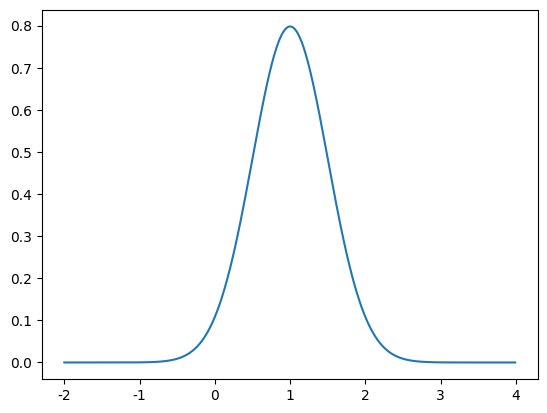

In [26]:
import scipy.integrate as integ

#构建服从正态分布的概率密度函数的值，均值mu为1，标准差sigma为0.5
x = np.arange(-2,4,0.01)
#根据x计算正态分布的概率密度函数
n_density = (1/(((2*np.pi)**0.5)*0.5))*np.exp((-(x-1)**2)/(2*(0.5**2)))#第1个公式f(x)
#正态分布的密度函数曲线，后面还有更具体的图形例子
print('正态分布概率密度函数曲线(均值:1，标准差:0.5)：')
plt.plot(x,n_density)
plt.show()



In [27]:
#累积分布函数的计算,设x0=1.5，则F(x0)=P(x<1.5)
#即求概率密度函数f(x)在(-Inf,1.5]区间的积分
def nf(x,mu,sigma):
    return (1/(((2*np.pi)**(0.5))*sigma))*np.exp((-(x-mu)**2)/(2*(sigma**2)))

# 累积分布函数是对概率密度函数求积分（针对连续型随机变量，离散型随机变量是求和）
n_distrib = integ.quad(nf,float('-Inf'),1.5,args=(1,0.5))[0]#第二个公式F(x)的实现
print('\n手工计算分布函数的值：', n_distrib)


#直接调用Scipy的累积分布函数
n_distrib_scipy = st.norm.cdf(1.5,1,0.5)
print('\nScipy函数计算正态分布的累积分布函数的值：', n_distrib_scipy)

#Scipy有关概率分布的其他应用
print('\n服从正态分布的随机数生成：',st.norm.rvs(1,0.5,5))

# pdf 概率密度函数 概率密度函数值 即为 概率在该点的变化率
# cdf 概率分布函数
# sf 生存函数

print('\n概率密度函数(显示前10个)：',st.norm.pdf(x,1,0.5)[0:10])
print('\n生存函数：',st.norm.sf(1.979981992270027,1,0.5))# sf=1-cdf
print('\n分位数函数：',st.norm.ppf(0.95,1,0.5))#注意：通常都是通过下分位数（下尾）计算分位数。

#该分布下随机变量有95%的可能性位于该区间
print('\n置信度0.95的置信区间：',st.norm.interval(0.95,1,0.5))


手工计算分布函数的值： 0.8413447460685428

Scipy函数计算正态分布的累积分布函数的值： 0.8413447460685429

服从正态分布的随机数生成： [1.57335628 0.62004469 0.51529326 0.58945983 0.8846959 ]

概率密度函数(显示前10个)： [1.21517657e-08 1.36983376e-08 1.54355684e-08 1.73861599e-08
 1.95754158e-08 2.20315272e-08 2.47858886e-08 2.78734461e-08
 3.13330824e-08 3.52080407e-08]

生存函数： 0.025

分位数函数： 1.8224268134757362

置信度0.95的置信区间： (0.020018007729972975, 1.979981992270027)


In [28]:
st.norm.pdf(x,1,0.5) # 概率密度函数

array([1.21517657e-08, 1.36983376e-08, 1.54355684e-08, 1.73861599e-08,
       1.95754158e-08, 2.20315272e-08, 2.47858886e-08, 2.78734461e-08,
       3.13330824e-08, 3.52080407e-08, 3.95463928e-08, 4.44015547e-08,
       4.98328539e-08, 5.59061552e-08, 6.26945476e-08, 7.02791019e-08,
       7.87497013e-08, 8.82059556e-08, 9.87582045e-08, 1.10528619e-07,
       1.23652410e-07, 1.38279152e-07, 1.54574238e-07, 1.72720466e-07,
       1.92919786e-07, 2.15395201e-07, 2.40392856e-07, 2.68184314e-07,
       2.99069050e-07, 3.33377168e-07, 3.71472369e-07, 4.13755196e-07,
       4.60666560e-07, 5.12691595e-07, 5.70363846e-07, 6.34269843e-07,
       7.05054063e-07, 7.83424335e-07, 8.70157722e-07, 9.66106894e-07,
       1.07220707e-06, 1.18948353e-06, 1.31905979e-06, 1.46216645e-06,
       1.62015076e-06, 1.79448703e-06, 1.98678788e-06, 2.19881638e-06,
       2.43249920e-06, 2.68994085e-06, 2.97343903e-06, 3.28550118e-06,
       3.62886238e-06, 4.00650466e-06, 4.42167775e-06, 4.87792149e-06,
      

t分布

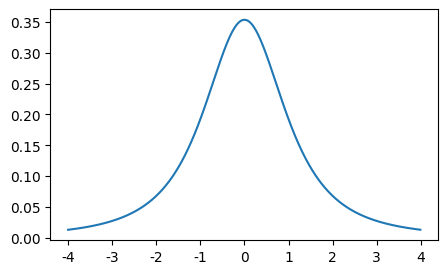

In [29]:
import scipy.special as ss
#t分布的概率密度函数
def tf(x,d):
    return  ss.gamma((d+1)/2)*((1+(x**2)/d)**(-(d+1)/2))/((d*np.pi)**0.5*ss.gamma(d/2))
d=2
x = np.arange(-4,4,0.01)
t = ss.gamma((d+1)/2)*((1+(x**2)/d)**(-(d+1)/2))/((d*np.pi)**0.5*ss.gamma(d/2))
plt.figure(figsize=(5,3))
plt.plot(x,t)
plt.show()

In [30]:
#手工计算的概率密度函数和分布函数的值。
print('t分布概率密度函数的值(x0=1,df=2)：',tf(1,2))

#求概率密度函数的积分即可求出分布函数的值。
print('\nt分布在x0=1处的累积分布函数值：',integ.quad(tf,float('-Inf'),1,args=(2))[0])

#通过Scipy函数计算二者的值，其他函数的调用和前面正态分布类似，只不过t多了一个自由度参数。
print('\n使用Scipy计算概率密度函数值：',st.t.pdf(1,2))
print('\n使用Scipy计算累积分布函数值：',st.t.cdf(1,2))

t分布概率密度函数的值(x0=1,df=2)： 0.19245008972987526

t分布在x0=1处的累积分布函数值： 0.7886751345948139

使用Scipy计算概率密度函数值： 0.19245008972987526

使用Scipy计算累积分布函数值： 0.7886751345948129


gamma分布

In [31]:
# gamma分布是一个连续分布，当x=3，a=2的概率密度函数值是？
x,a=3,2
gamma_pdf=x**(a-1)*np.exp(-3)/ss.gamma(2)
###比较手工计算与stats包gamma分布的pdf函数计算的值
#二者相等。后面一个值是调用pdf函数计算的
gamma_pdf,st.gamma.pdf(3,2)

(0.14936120510359183, 0.14936120510359185)

In [32]:
###a=3,b=4,x=0.1
# beta函数的概率密度函数，beta和gamma在统计自然语言处理还是比较重要的
0.1**2*0.9**3/ss.beta(3,4),st.beta.pdf(0.1,3,4)

(0.4374000000000001, 0.4373999999999995)

# 1.3 概率分布函数的图形

常用分布函数在上表列出。
此处以正态分布、F分布和卡方分布为例，使用python绘制各自的概率密度函数曲线

t-分布：
t-分布通常用于估计总体均值。特别是当样本大小较小（通常认为n<30）或者总体标准差未知时，我们通常用 t-分布来进行假设检验或建立置信区间。
举例：你可能在医学实验中使用t-检验来确定两组病人接受不同治疗后，其恢复时间是否存在显著差异。

卡方分布：
卡方分布主要用于分类数据的分析，像卡方独立性检验和适合度测试。
卡方独立性检验用于检验两个分类变量是否独立。例如，你可能在研究中使用它来检查吸烟和患肺癌的是否有关。
卡方适合度检验用于检验观察数据和理论分布的一致性。例如，你可能要检验一个骰子是否均匀，即每一面出现的概率是否都是1/6。

F-分布：
F-分布主要用于分析方差。它常用于统计学中的方差分析（ANOVA），主要用于比较三个或更多组的均值是否存在显著差异。它也用于多元线性回归分析中，检验整个模型以及模型中的各个参数是否显著。
举例：在临床试验中，你可能对三种不同的治疗方法对恢复时间的影响进行F检验。



## 1.3.1 正态分布的图形

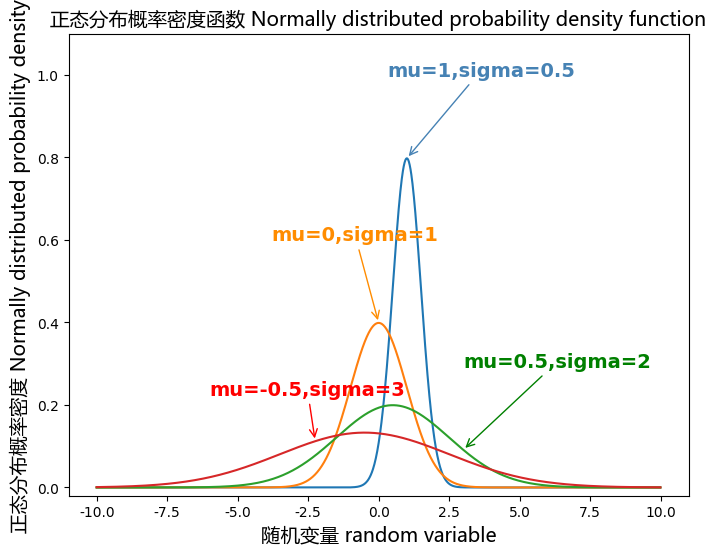

In [33]:
'''
正态分布的概率密度函数图形，根据不同的均值和标准差绘制曲线
'''

plt.figure(figsize=(8,6))
x = np.arange(-10.,10.,0.01)
y = st.norm.pdf(x,1.0,0.5)
plt.annotate("mu=1,sigma=0.5",
             xy=(1.0,st.norm.pdf(1.0,1.0,0.5)), # 标注点坐标
             xytext=(0.3,st.norm.pdf(1.0,1.0,0.5)+0.2), # 文本的坐标
             weight="bold",color='steelblue',fontsize=14, 
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color="steelblue"))

y1 = st.norm.pdf(x,0.0,1.0)
plt.annotate("mu=0,sigma=1",xy=(0.0,st.norm.pdf(0.0,0.0,1.0)),
             xytext=(-3.8,st.norm.pdf(0.0,0.0,1.0)+0.2),
             weight="bold",color='darkorange',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))

y2 = st.norm.pdf(x,0.5,2.0)
plt.annotate("mu=0.5,sigma=2",xy=(3.0,st.norm.pdf(3.0,0.5,2.0)),
             xytext=(3.0,st.norm.pdf(3.0,0.5,2.0)+0.2),
             weight="bold",color='g',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))

y3 = st.norm.pdf(x,-0.5,3.0)
plt.annotate("mu=-0.5,sigma=3",xy=(-2.25,st.norm.pdf(-2.25,-0.5,3.0)),
             xytext=(-6,st.norm.pdf(-6,-0.5,3.0)+0.2),
             weight="bold",color='r',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("正态分布概率密度函数 Normally distributed probability density function",fontproperties = WRYH,size=14)
plt.xlabel("随机变量 random variable",size=14,fontproperties = WRYH)
plt.ylabel("正态分布概率密度 Normally distributed probability density",size=14,fontproperties = WRYH)
plt.ylim(-0.02,1.1)
plt.show()

## $\chi^2$卡方分布的图形

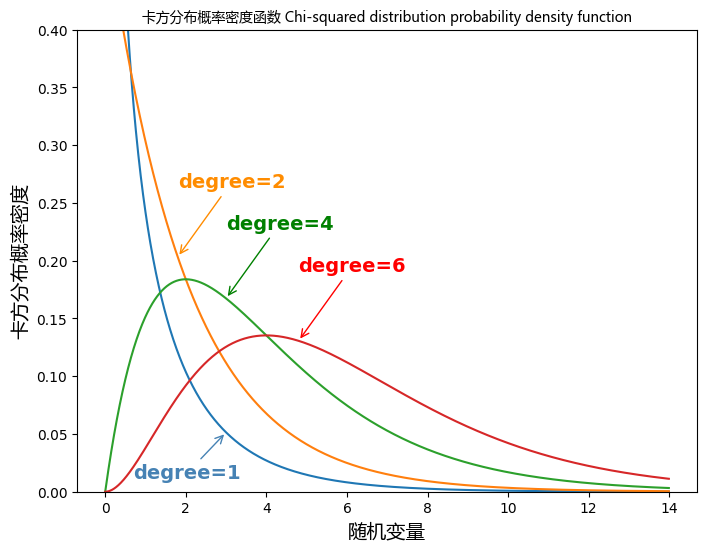

In [35]:
'''
卡方分布不同自由度的概率密度函数图形
'''
###生成模拟数据
x = np.arange(0.,14.,0.01)
#自由度(degree=1)的卡方分布随机数概率密度函数
y = st.chi2.pdf(x,1)
###annotate函数设置指向概率密度函数曲线的箭头和文字
plt.figure(figsize=(8,6))
plt.annotate("degree=1",xy=(3,st.chi2.pdf(3,1)),
             xytext=(0.7,st.chi2.pdf(3,1)-0.04),weight="bold",color='steelblue',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="steelblue"))

#生成另一个模拟数据，下面几行代码同样功能。
y1 = st.chi2.pdf(x,2)
plt.annotate("degree=2",xy=(1.8,st.chi2.pdf(1.8,2)),
             xytext=(1.8,st.chi2.pdf(1.8,2)+0.06),weight="bold",color='darkorange',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.chi2.pdf(x,4)
plt.annotate("degree=4",xy=(3,st.chi2.pdf(3,4)),
             xytext=(3,st.chi2.pdf(3,4)+0.06),weight="bold",color='g',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.chi2.pdf(x,6)
plt.annotate("degree=6",xy=(4.8,st.chi2.pdf(4.8,6)),
             xytext=(4.8,st.chi2.pdf(4.8,6)+0.06),weight="bold",color='r',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("卡方分布概率密度函数 Chi-squared distribution probability density function",size=14,fontproperties = WRYH)
plt.xlabel("随机变量",size=14,fontproperties = WRYH)
plt.ylabel("卡方分布概率密度",size=14,fontproperties = WRYH)
plt.ylim(0.,0.4)
plt.show()

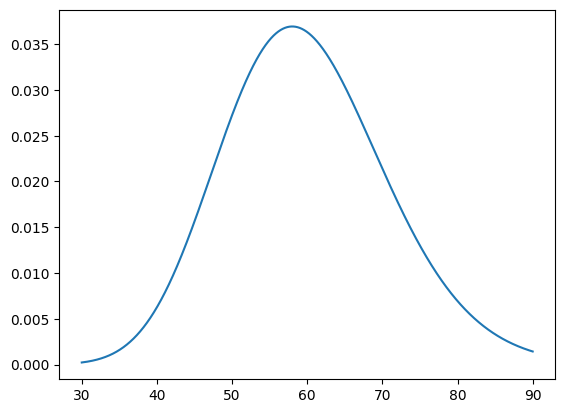

In [106]:
###卡方分布的自由度极端高的曲线，这种情况极少见。
#当自由度趋近无穷时，卡方分布渐进服从正态分布，但是存在争议。
#见：https://www.zhihu.com/question/363857851
x = np.arange(30.,90.,0.01)#随机数
y5 = st.chi2.pdf(x,60)
plt.plot(x,y5)#曲线和正态分布钟形很相似
plt.show()



## 1.3.3 F分布的图形

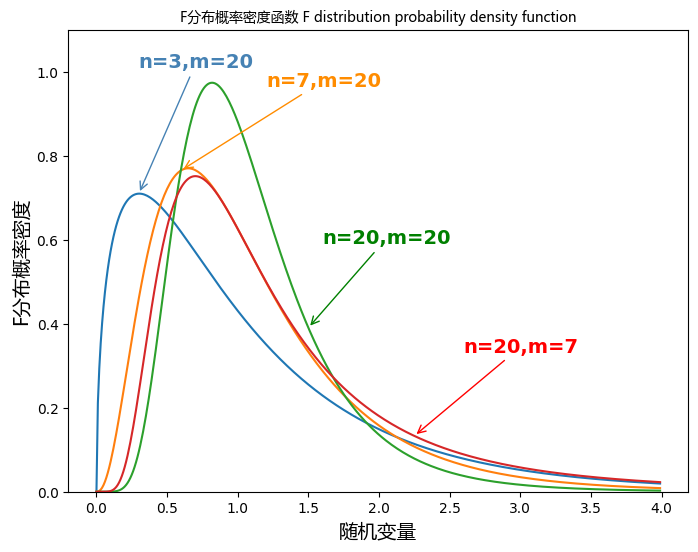

In [38]:
'''
F分布不同自由度的概率密度函数图形
'''

plt.figure(figsize=(8,6))
#生成模拟数据
x = np.arange(0.,4.,0.01)#随机数
y = st.f.pdf(x,3,20)#自由度为(3,20)的F分布随机数概率密度函数

#annotate函数设置指向概率密度函数曲线的箭头和文字
plt.annotate("n=3,m=20",xy=(0.3,st.f.pdf(0.3,3,20)),
             xytext=(0.3,st.f.pdf(.3,3,20)+0.3),weight="bold",color='steelblue',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="steelblue"))
#生成另一个模拟数据，下面几行代码同样功能。
y1 = st.f.pdf(x,7,20)
plt.annotate("n=7,m=20",xy=(0.6,st.f.pdf(0.6,7,20)),
             xytext=(1.2,st.f.pdf(.6,7,20)+0.2),weight="bold",color='darkorange',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.f.pdf(x,20,20)
plt.annotate("n=20,m=20",xy=(1.5,st.f.pdf(1.5,20,20)),
             xytext=(1.6,st.f.pdf(1.5,20,20)+0.2),weight="bold",color='g',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.f.pdf(x,20,7)
plt.annotate("n=20,m=7",xy=(2.25,st.f.pdf(2.25,20,7)),
             xytext=(2.6,st.f.pdf(2.25,20,7)+0.2),weight="bold",color='r',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("F分布概率密度函数 F distribution probability density function",size=14,fontproperties = WRYH)
plt.xlabel("随机变量",size=14,fontproperties = WRYH)
plt.ylabel("F分布概率密度",size=14,fontproperties = WRYH)
plt.ylim(0.,1.1)
plt.show()

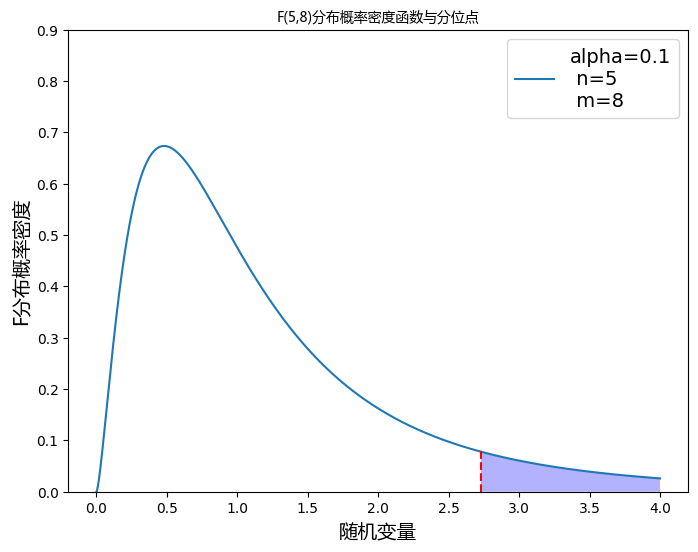

In [39]:
'''
F分布的分位点填充图形
'''
x = np.arange(0.,4.,0.001)
y = st.f.pdf(x,5,8)
plt.figure(figsize=(8,6))
plt.plot(x,y,label="alpha=0.1\n n=5 \n m=8")
plt.title("F(5,8)分布概率密度函数与分位点",size=14,fontproperties = WRYH)
plt.xlabel("随机变量",size=14,fontproperties = WRYH)
plt.ylabel("F分布概率密度",size=14,fontproperties = WRYH)
plt.ylim(0.,0.9)
x1 = st.f.ppf(0.9,5,8)  #注意：scipy的ppf函数时通过下分位来求分位数的, 也就是0.9下分位数对应0.1的上分位数
x2 = x[np.where(x>x1)]
#axvline函数画垂直线
plt.axvline(x=x1,ymax=st.f.pdf(x1,5,8)+0.01,ls="--",c="red")#添加垂直直线
#fill_between填充分布函数分位点的颜色，上0.1分位数对应的概率填充图
plt.fill_between(x2,y[np.where(x>x1)],0,facecolor="blue",alpha=0.3)
plt.legend(fontsize=14)
plt.show()

# 1.4 直方图、经验分布函数与QQ图
## 1.4.1 直方图与核密度估计

/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPyt

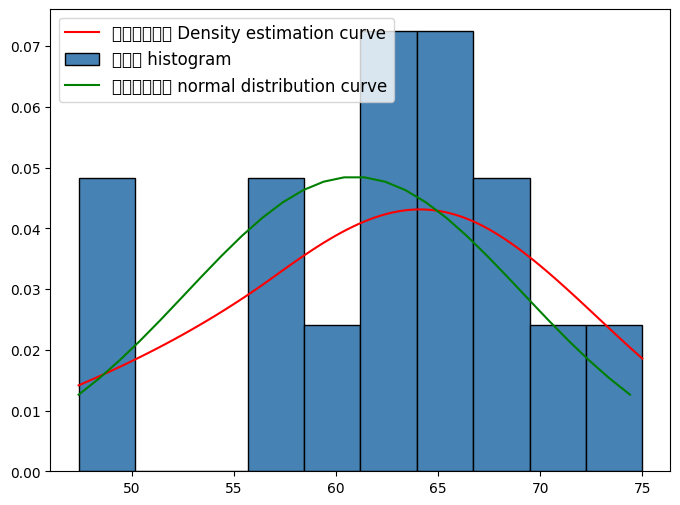

/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPyt

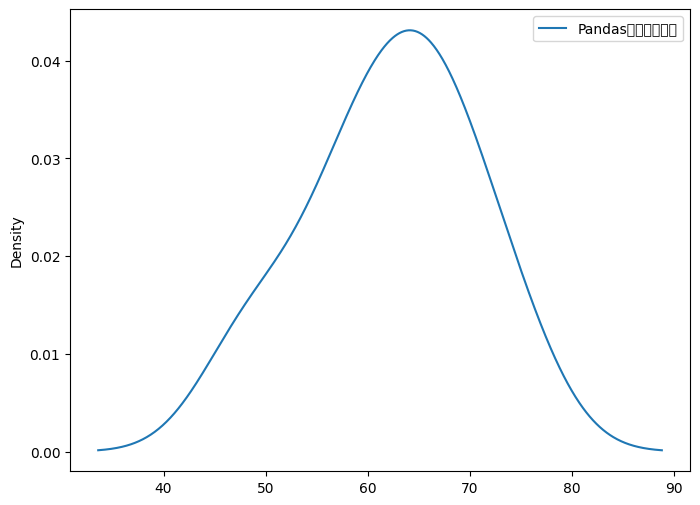

In [43]:
'''
数据的直方图、核密度估计曲线
'''
from scipy.interpolate import interp1d
import matplotlib.mlab as mlab  
#数据去重 set进行处理
weight_set = np.array(list(set(weights)))

#生成高斯核密度估计
kd = st.gaussian_kde(weight_set)
#dens = kd.evaluate(weight_set)
#通过高斯核密度估计计算概率密度
dens = kd.pdf(weight_set)
 # 插值法，100表示插值个数，个数>=实际数据个数，一般来说插值个数越多，曲线越平滑
x_new = np.linspace(min(weight_set),max(weight_set),100)  
#生成插值：'cubic'表示三次样条插值（Cubic Spline Interpolation）
f = interp1d(weight_set,dens, kind='cubic')
y_new = f(x_new)

#画出密度估计曲线
plt.figure(figsize=(8,6))
plt.plot(x_new,y_new,color='r',label="密度估计曲线 Density estimation curve")

#绘制直方图
plt.hist(weights,color='steelblue',density=True,label="直方图 histogram",edgecolor='k')

#根据体重数据的最大、最小值生成该范围内的正态分布密度函数值
x_norm = np.arange(np.min(weight_set),np.max(weight_set),1)
plt.plot(x_norm,st.norm.pdf(x_norm,np.mean(x_norm),st.tstd(x_norm)),
         color='g',label="正态分布曲线 normal distribution curve")

plt.legend(fontsize=12)
plt.show()

#使用Pandas计算密度估计曲线，效果也很好。
dx = pd.Series(weight_set)
plt.figure(figsize=(8,6))
dx.plot(kind='kde',label="Pandas密度曲线估计")
plt.legend()
plt.show()


## 1.4.2 经验分布函数


/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPyt

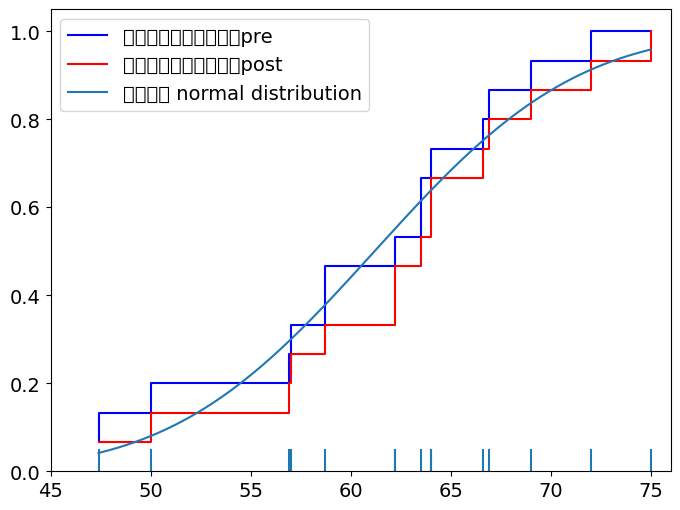

In [110]:

'''
经验分布
'''
import statsmodels.distributions.empirical_distribution as em

#仍是用前面的体重数据
x = np.array([75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7,
              63.5,66.6, 64.0, 57.0, 69.0, 56.9, 50.0, 72.])

# 使用StatsModels的经验分布函数ECDF估计总体分布函数。
# python这个语言是大小写敏感的
ecdf = em.ECDF(x)
x.sort() # 对于x进行排序，由小到大，否则结果就不美观
F = ecdf(x)
# 使用matplotlib的step函数绘制经验分布函数曲线
plt.figure(figsize=(8,6))
plt.step(x, F, color='b',where='pre',label="经验分布（前点阶跃）pre")
plt.step(x, F, color='r',where='post',label="经验分布（后点阶跃）post")
plt.xlim(45, 76)#设置x轴的范围
plt.ylim(0, 1.05)#设置y轴的范围
plt.vlines(x, 0, .05)#绘制垂直线


x_min = x.min()
x_max = x.max()
x_n = np.arange(x_min,x_max,0.01)
#根据x值获得y轴上的正态分布累积分布函数的值
y = st.norm.cdf(x_n,np.mean(x_n),np.std(x_n))
plt.plot(x_n,y,label="正态分布 normal distribution")
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()



## 1.4.3 QQ图与茎叶图

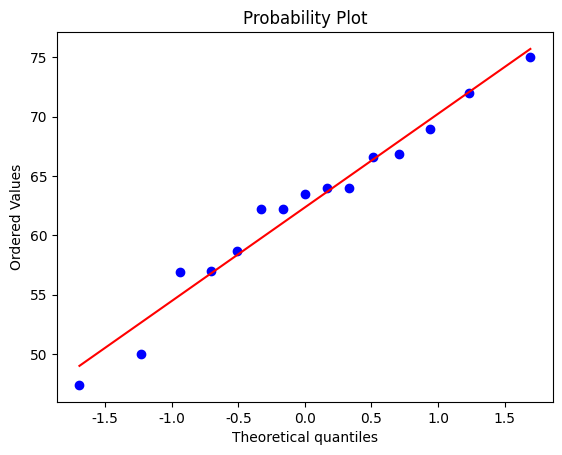

In [111]:
weights = [75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7, 63.5,66.6, 
                               64.0, 57.0, 69.0, 56.9, 50.0, 72.]
#利用Scipy绘制QQ图
st.probplot(weights,plot=plt)
plt.show()

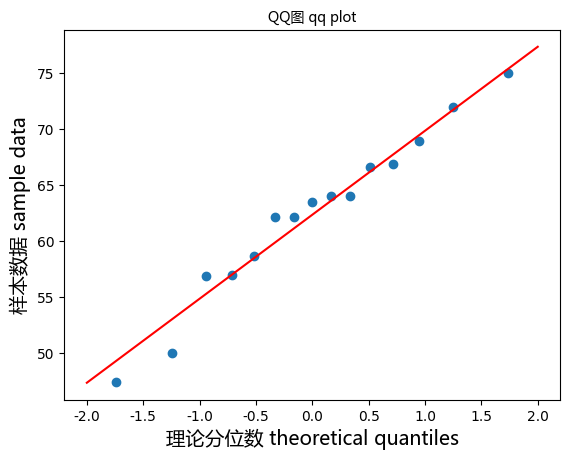

In [44]:


# QQ图数据生成原理

###手工计算QQ图

import scipy.special as ss
x = weights
n = len(x)#此处使用排序后的weights即前面的x
phi = np.zeros(n)
x = sorted(x)
#计算数据的标准正态分布反函数值，公式见下图
for i in range(1,n+1):
    #ndtri函数计算标准正态分布函数的反函数（注意是分布函数的反函数，不是密度函数的反函数）
    phi[i-1] = ss.ndtri((i-0.375)/(n+0.25))
#画出QQ散点图
plt.scatter(phi,x)

#绘制QQ图
q_std = st.tstd(x)#使用标准差的无偏估计
q_mean = np.mean(x)
qx = np.arange(-2,3)
qy = q_std*qx + q_mean#y = std*x + mu
plt.xlabel("理论分位数 theoretical quantiles",size=14,fontproperties = WRYH)
plt.ylabel("样本数据 sample data",size=14,fontproperties = WRYH)
plt.title("QQ图 qq plot",size=20,fontproperties = WRYH)
plt.plot(qx,qy,color='r')
plt.show()



In [113]:
'''
茎叶图，用于直观展现数据分布的结构：竖线左边是十位数，右边是个位数
'''
from itertools import groupby
#某课程的考试分数
scores = np.array([25, 45, 50, 54, 55, 61, 64, 68, 72, 75, 75,
                   78, 79, 81, 83, 84, 84, 84, 85, 86, 86, 86,
                   87, 89, 89, 89, 90, 91, 91, 92, 100])

for k, g in groupby(sorted(scores),key=lambda x:x//10):
    l = map(str, [int(_) % 10 for _ in list(g)])
    print(k,'|',' '.join(l))

2 | 5
4 | 5
5 | 0 4 5
6 | 1 4 8
7 | 2 5 5 8 9
8 | 1 3 4 4 4 5 6 6 6 7 9 9 9
9 | 0 1 1 2
10 | 0


# 1.5 多元数据的数据特征与相关性分析
## 1.5.1 二元数据的数字特征
![](figures/fig1_2.png)

In [114]:
#矿石数据分析

x = np.array([67, 54, 72, 64, 39, 22, 58, 43, 46, 34])
y = np.array([24, 15, 23, 19, 16, 11, 20, 16, 17, 13])
#将数据合并,合并成列向量。
data = np.c_[x,y]#此函数比较常用

print('矿石数据：\n',data)
#两种成分的均值，注意mean函数的axis参数指定计算哪个轴方向，此处为列向量。
print('\n矿石两种有用成分百分比：\n',pd.DataFrame(np.mean(data,axis=0),
                                      index=['x','y'],columns=['均值']))
#协方差矩阵与相关系数矩阵
print('\n两种成分的协方差矩阵：\n',pd.DataFrame(np.round(np.cov(data.T),2),
                                     index=['x','y'],columns=['x','y']))
print('\n两种成分的相关系数矩阵：\n',pd.DataFrame(np.round(np.corrcoef(data.T),2),
                                    index=['x','y'],columns=['x','y']))

矿石数据：
 [[67 24]
 [54 15]
 [72 23]
 [64 19]
 [39 16]
 [22 11]
 [58 20]
 [43 16]
 [46 17]
 [34 13]]

矿石两种有用成分百分比：
      均值
x  49.9
y  17.4

两种成分的协方差矩阵：
         x      y
x  252.77  60.60
y   60.60  17.16

两种成分的相关系数矩阵：
       x     y
x  1.00  0.92
y  0.92  1.00


In [115]:
'''
对矿石的两个成分之间的相关性分析，分析两种成分之间是否存在相关性
注意：Pearsonr检验的原假设是数据产生不相关的数据集

当p小于0.05，可以拒绝接受不是产生于同一个数据集或数据类型的原假设，即两者相关
'''
# 两变量的Pearson相关系数有自己的使用条件，要求两个连续变量服从双变量正态分布，也叫做二元正态分布。
print('矿石有用成分之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,0],data[:,1]))
#spearmanr函数无需假设数据服从正态分布，是一种典型的非参检验，原假设为数据不相关
print('\n矿石有用成分之间有无关联性(spearmanr):',st.spearmanr(data[:,0],data[:,1]))
#kendalltau也是一种非参检验；原假设为数据不相关
print('\n矿石有用成分之间有无关联性(kendalltau):',st.kendalltau(data[:,0],data[:,1]))

矿石有用成分之间有无关联性(pearsonr函数)： PearsonRResult(statistic=0.9202595441018039, pvalue=0.0001605157958250389)

矿石有用成分之间有无关联性(spearmanr): SignificanceResult(statistic=0.8997002046464955, pvalue=0.00039167359562948393)

矿石有用成分之间有无关联性(kendalltau): SignificanceResult(statistic=0.764093177458341, pvalue=0.002263469812035174)


In [71]:
#测试两种不同分布的数据是否相关。
a = st.t.rvs(size=10,df=3)
b = st.f.rvs(size=10,dfn=10,dfd=9)
st.kendalltau(a,b)#结果很显然不能拒绝不相关的原假设。p-value>0.05

SignificanceResult(statistic=0.06666666666666667, pvalue=0.8618005952380953)

## 1.5.2多变量
![](./figures/fig1_3.jpg)

In [46]:
'''
多元数据的数字特征。
'''
###x1,x2,x3分别代表橡胶的硬度、变形与弹性
x1=np.array([65,70,70,69,66,67,68,72,66,68])
x2=np.array([45,45,48,46,50,46,47,43,47,48])
x3=np.array([27.6,30.7,31.8,32.6,31.0,31.3,37.0,33.6,33.1,34.2])
data=np.c_[x1,x2,x3]

###协方差矩阵
print('3项指标的协方差矩阵：\n',pd.DataFrame(np.round(np.cov(data.T),2),
                                     index=['硬度','变形','弹性'],columns=['硬度','变形','弹性']))
###相关系数矩阵
print('\n3项指标的相关系数矩阵：\n',pd.DataFrame(np.round(np.corrcoef(data.T),2),
                                     index=['硬度','变形','弹性'],columns=['硬度','变形','弹性']))

3项指标的协方差矩阵：
       硬度    变形    弹性
硬度  4.77 -1.94  1.93
变形 -1.94  3.83  0.62
弹性  1.93  0.62  6.19

3项指标的相关系数矩阵：
       硬度    变形    弹性
硬度  1.00 -0.45  0.36
变形 -0.45  1.00  0.13
弹性  0.36  0.13  1.00


In [47]:
print('橡胶的硬度和变形之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,0],data[:,1]))
print('\n橡胶的硬度和弹性之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,0],data[:,2]))
print('\n橡胶的变形和弹性之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,1],data[:,2]))

橡胶的硬度和变形之间有无关联性(pearsonr函数)： PearsonRResult(statistic=-0.4548831555240914, pvalue=0.18653609957909667)

橡胶的硬度和弹性之间有无关联性(pearsonr函数)： PearsonRResult(statistic=0.35612908480948774, pvalue=0.3124791340545786)

橡胶的变形和弹性之间有无关联性(pearsonr函数)： PearsonRResult(statistic=0.12659622460695796, pvalue=0.7274664789312599)


# 1.6 多元数据的基本图形表示
![](./figures/fig1_4.jpg)

/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25919 (\N{CJK UNIFIED IDEOGRAPH-653F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27835 (\N{CJK UNIFIED IDEOGRAPH-6CBB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/data/t070421/miniconda3/envs/scvi-env/lib/python3.9/site-packages/IPyt

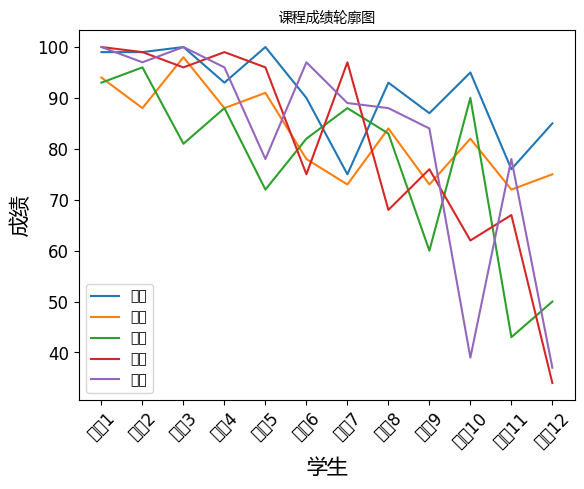

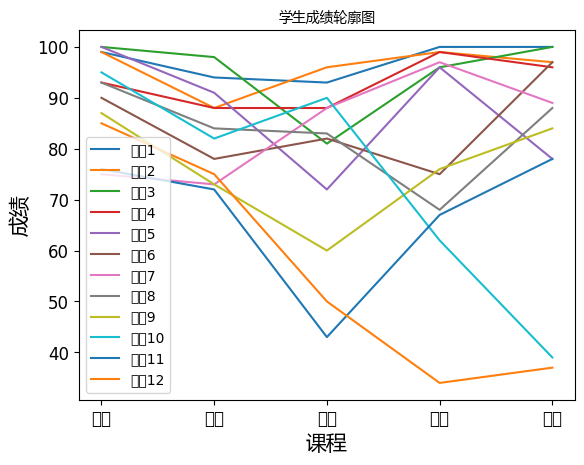

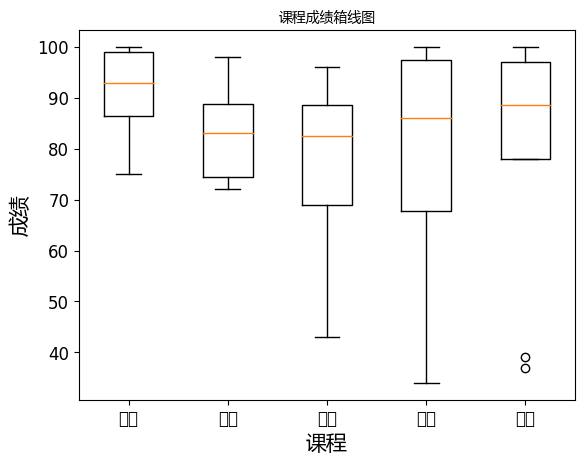

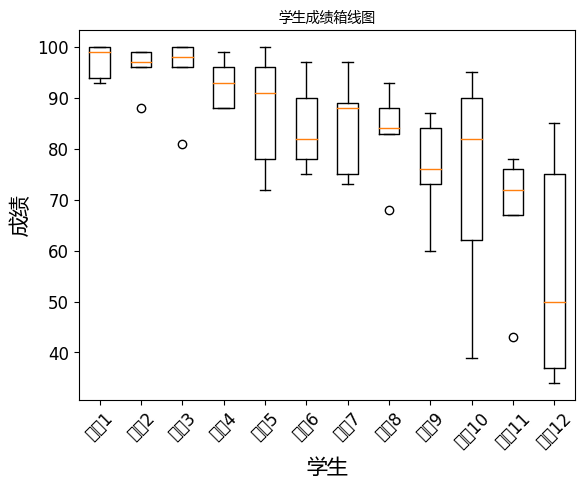

In [50]:
#学生成绩，Xn代表某一门课所有抽样学生的成绩。
X1=[99, 99, 100, 93, 100, 90, 75, 93, 87, 95, 76, 85]#政治
X2=[94, 88,  98, 88,  91, 78, 73, 84, 73, 82, 72, 75]#语文
X3=[93, 96,  81, 88,  72, 82, 88, 83, 60, 90, 43, 50]#外语
X4=[100, 99,  96, 99,  96, 75, 97, 68, 76, 62, 67, 34]#数学
X5=[100, 97, 100, 96,  78, 97, 89, 88, 84, 39, 78, 37]#物理
scores = np.c_[X1,X2,X3,X4,X5]
#plt.polar(scores)

#课程的轮廓图
plt.figure()
plt.xlabel('学生',size=15,fontproperties = WRYH)
plt.ylabel('成绩',size=15,fontproperties = WRYH)
plt.title('课程成绩轮廓图',size=15,fontproperties = WRYH)
#课程表
courses = np.array(['政治','语文','外语','数学','物理'])
#画出每门课的轮廓线
for i in np.arange(0,scores.shape[1]):
    plt.plot(np.arange(1,scores.shape[0]+1),scores[:,i],label=courses[i])  
    plt.legend()

plt.xticks(np.arange(1,scores.shape[0]+1),
           ['学生'+str(i+1) for i in np.arange(0,scores.shape[0])])
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)

#学生轮廓图
plt.figure()
plt.xlabel('课程',size=15,fontproperties = WRYH)
plt.ylabel('成绩',size=15,fontproperties = WRYH)
plt.title('学生成绩轮廓图',size=15,fontproperties = WRYH)
#画出每个学生的轮廓线
for i in np.arange(0,scores.shape[0]):
    plt.plot(np.arange(1,scores.shape[1]+1),scores[i,:],label='学生'+str(i+1))   
    plt.legend(loc=3)
plt.yticks(size=12)
plt.xticks(np.arange(1,scores.shape[1]+1),courses,size=12 )

#课程成绩箱线图
plt.figure() 
plt.xlabel('课程',size=15,fontproperties = WRYH)
plt.ylabel('成绩',size=15,fontproperties = WRYH)
plt.title('课程成绩箱线图',size=15,fontproperties = WRYH)
plt.boxplot(scores)#以列向量作为对象，即成绩为x轴

plt.xticks(np.arange(1,scores.shape[1]+1),courses,size=12)
plt.yticks(size=12)

#学生成绩箱线图
plt.figure() 
plt.xlabel('学生',size=15,fontproperties = WRYH)
plt.ylabel('成绩',size=15,fontproperties = WRYH)
plt.title('学生成绩箱线图',size=15,fontproperties = WRYH)
plt.boxplot(scores.T)#转置之后即以学生为x轴
plt.xticks(np.arange(1,scores.shape[0]+1))
plt.xticks(np.arange(1,scores.shape[0]+1),
           ['学生'+str(i+1) for i in np.arange(0,scores.shape[0])])
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.show()